In [1]:
%matplotlib inline
import numpy as np
import bettermoments as bm
import matplotlib.pyplot as plt
from imgcube.cube import imagecube
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm

In [5]:
# read in the data and build the velocity axis
data, x0, dx, pix, uncertainty = bm.data_from_fits('HD135344B_13CO.fits', nchan=3)
axis = (np.arange(-data.shape[1] // 2, data.shape[1] // 2) + 0.5) * pix
velax = np.arange(data.shape[0]) * dx + x0

In [3]:
# calculate contour of 3% of peak integrated intensity for plotting
# using a 3 sigma clip.
rms = np.nanstd([data[:3], data[-3:]])
clip = 3. * rms
zeroth = np.sum(np.where(np.abs(data) >= clip, data, 0.0), axis=0)
zeroth /= np.max(zeroth)

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal


In [4]:
# calculate the intensity weighted average, clipping at 2 sigma.
# include some smaller scatter as weights can't sum to zero.
clip = 2. * rms
weights = np.where(np.abs(data) >= clip, data, 1e-10 * np.random.randn(data.size).reshape(data.shape))
velocities = velax[:, None, None] * np.ones(data.shape)
v_first = np.average(velocities, weights=weights, axis=0)

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater_equal


In [5]:
# calculate the velocity of the peak pixels.
v_ninth = np.take(velax, np.argmax(data, axis=0))

In [6]:
# calculate the velocity with better moments.
v_quadratic = bm.quadratic(data, axis=0, x0=velax[0], dx=np.diff(velax).mean())[0]

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


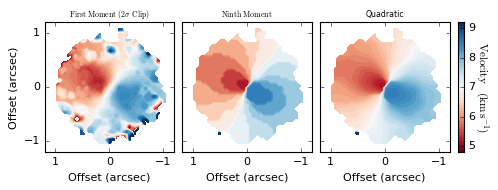

In [8]:
# make the plot.
fig = plt.figure(figsize=(6.0, 2.5))
axs = AxesGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.1, share_all=True,
               label_mode="L", cbar_location="right", cbar_mode="single", cbar_pad=0.1)
labels = [r'${\rm First \,\, Moment \,\, (2\sigma \,\, Clip)}$',
          r'${\rm Ninth \,\, Moment}$',
          'Quadratic']

for ax, mom, label in zip(axs, [v_first, v_ninth, v_quadratic], labels):
    
    im = ax.contourf(axis[::-1] - 0.1, axis - 0.1, np.where(zeroth >= 0.05, mom / 1e3, np.nan),
                     levels=np.linspace(4.8, 9.2, 50), cmap=cm.RdBu)
    for c in im.collections:
        c.set_edgecolor("face")
    ax.set_aspect(1)
    ax.set_xlim(1.2, -1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.xaxis.set_major_locator(MultipleLocator(1.0))
    ax.yaxis.set_major_locator(MultipleLocator(1.0))
    
    ax.set_xlabel(r'Offset (arcsec)')
    ax.set_ylabel(r'Offset (arcsec)')
    ax.set_title(label, fontsize=7)
    
cb = axs.cbar_axes[0].colorbar(im)
cb.solids.set_edgecolor("face")
axs.cbar_axes[0].set_ylabel(r'${\rm Velocity \quad (km\,s^{-1})}$', rotation=270., labelpad=13)
plt.tight_layout()
#plt.savefig('moment_comparison.pdf', bbox_inches='tight')